In [14]:
#define as bibliotecas/pacotes a serem utilizadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mapFeature import mapFeature
from costFunctionReg import costFunctionReg, gdFunction
from plotDecisionBoundary import plotDecision

In [2]:
def importarDados(insertOnes=True, filepath='/data/ex2data2.txt', names=['Teste 1', 'Teste 2', 'Aceito']):
    path = os.getcwd() + filepath
    data = pd.read_csv(path, header=None, names=names)

    # A primeira coluna, preenchida com 1's, represenhta o theta0
    if insertOnes:
        data.insert(0, 'Ones', 1)

    # converte de dataframes para arrays
    cols = data.shape[1]
    X = data.iloc[:, 0:cols - 1]
    y = data.iloc[:, cols - 1:cols]

    # converte de arrays para matrizes
    X = np.array(X.values)
    y = np.array(y.values)

    return data, X, y

In [3]:
def plot(data, filename = 'target/plot4.1.png'):

    # gerando o gráfico de dispersão dos dados

    positivo = data[data['Aceito'].isin([1])]
    negativo = data[data['Aceito'].isin([0])]

    fig, ax = plt.subplots(figsize=(7,4))
    ax.axis([-1, 1.5, -0.8, 1.2])
    ax.scatter(positivo['Teste 1'], positivo['Teste 2'], s=50, c='k', marker='+', label='y=1')
    ax.scatter(negativo['Teste 1'], negativo['Teste 2'], s=50, c='y', marker='o', label='y=0')
    ax.legend()
    ax.set_xlabel('Microchip Test 1')
    ax.set_ylabel('Microchip Test 2')

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

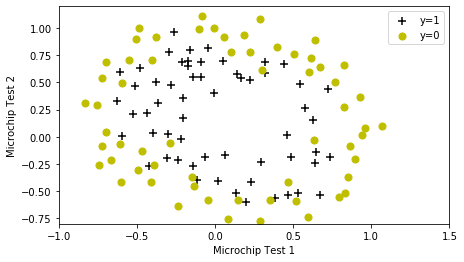

In [4]:
#armazena os dados retornadas pela função de leitura em cada variável
data, X, y=importarDados()
#chama função para plotagem de gráfico
plot(data)

In [5]:
#escolhe os valores que serão utilizados no mapeamento de features, nesse caso, X
datamap=X[:, 1:]
#chama a função criada para mapear features, informando os valores de X e do índice a ser usado no mapeamento
mapa=mapFeature(datamap, indice=6)
#mapa criado do primeiro par de características
print (mapa[0])

[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
 3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
 2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
 1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
 4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
 1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
 4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [6]:
#valores iniciais de theta, para total de valores mapeados
theta=np.zeros(mapa.shape[1])

In [7]:
#valor de custo para lamb = 1 e theta = 0
J = costFunctionReg(theta, mapa, y, 1)
print (J)

0.6931471805599454


In [9]:
res = opt.fmin_tnc(func=costFunctionReg, x0=theta, fprime=gdFunction, args=(mapa, y, 1))
print(res[0])
#implementando a função de custo, usando os valores de theta encontrados no cálculo com lambda = 1, e alternando
#o valor de lambda para 0 e 100, nota-se que quando lambda = 0, o custo da função é menor, o que ser um indicador
#de overfitting, e com lambda = 100, o custo é muito maior, indicando underfitting.
j0 = costFunctionReg(res[0], mapa, y, 0)
j100 = costFunctionReg(res[0], mapa, y, 100)
print (j0, j100)

[ 1.27271027  0.62529965  1.18111686 -2.01987399 -0.9174319  -1.43166929
  0.12393228 -0.36553118 -0.35725403 -0.17516292 -1.45817009 -0.05098418
 -0.61558554 -0.27469165 -1.19271298 -0.2421784  -0.20603298 -0.04466178
 -0.27778951 -0.29539513 -0.45645982 -1.04319155  0.02779373 -0.2924487
  0.0155576  -0.32742406 -0.1438915  -0.92467487]
0.4624603778900102 7.1166955853386185


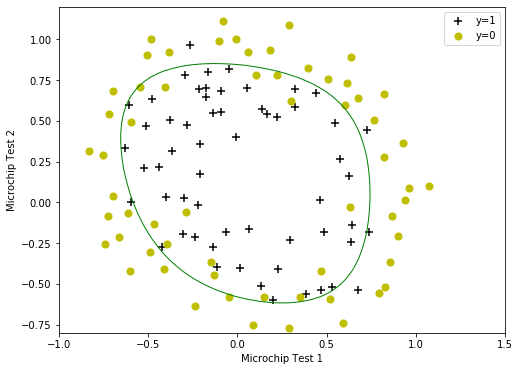

In [10]:
plotDecision(data, X, res[0], filename = 'target/plot4.4.png')